In [ ]:
import sys
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
np.random.seed(2)

In [ ]:
import seaborn as sns

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0
3972,3624,-0.663445,1.162921,1.508050,0.549405,0.231377,-0.106041,0.817977,-0.387026,1.488054,...,-0.420337,-0.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
class1Data = data[data['Class']==1]
print(class1Data)

        Time         V1         V2         V3        V4         V5        V6  \
541      406  -2.312227   1.951992  -1.609851  3.997906  -0.522188 -1.426545   
623      472  -3.043541  -3.157307   1.088463  2.288644   1.359805 -1.064823   
4920    4462  -2.303350   1.759247  -0.359745  2.330243  -0.821628 -0.075788   
6108    6986  -4.397974   1.358367  -2.592844  2.679787  -1.128131 -1.706536   
6329    7519   1.234235   3.019740  -4.304597  4.732795   3.624201 -1.357746   
...      ...        ...        ...        ...       ...        ...       ...   
15566  26961 -23.237920  13.487386 -25.188773  6.261733 -17.345188 -4.534989   
15736  27163 -23.914101  13.765942 -25.733734  6.290918 -17.784824 -4.572498   
15751  27187 -24.590245  14.044567 -26.278701  6.320089 -18.224513 -4.609968   
15781  27219 -25.266355  14.323254 -26.823673  6.349248 -18.664251 -4.647403   
15810  27252 -25.942434  14.601998 -27.368650  6.378395 -19.104033 -4.684806   

              V7         V8        V9  

In [ ]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)  

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.439557
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.336417
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.649174
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.301611
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,0.019011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,0.0,-0.071245
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,0.0,0.177449
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,0.0,0.043252
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,...,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,0.0,-0.318936


In [ ]:
data = data.drop(['Time'],axis=1)

In [ ]:
X_half1 = data.sample(n=200)


In [ ]:
X_half2 = data[data['Class']==1]

In [ ]:
data = pd.concat([X_half1,X_half2]).reset_index(drop=True)


In [ ]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-0.201642,0.692840,1.602409,-0.730746,0.422121,0.362535,0.368477,-0.222186,1.046974,-0.490982,...,-0.049633,0.254356,-0.347401,-0.786066,-0.100415,1.002001,-0.353959,-0.239270,0.0,-0.271669
1,1.169396,-0.261154,1.371301,0.559715,-1.354854,-0.664045,-0.796704,-0.041523,2.286325,-0.618186,...,-0.055986,0.164594,0.018290,0.735033,0.113810,1.050157,-0.070270,0.013624,0.0,-0.218592
2,-0.806611,1.530681,1.091232,1.443449,0.357915,-0.051527,0.375167,-0.115956,0.533858,-0.107835,...,-0.082289,0.016155,-0.415400,-0.476999,0.530848,-0.095671,-0.686606,-0.275973,0.0,-0.320837
3,-0.449996,1.015031,0.715840,0.888559,0.789949,-0.144786,0.772781,-0.086211,-0.403040,0.017375,...,0.114363,0.676034,-0.138460,-0.219229,-0.357858,-0.290586,0.344544,0.275412,0.0,-0.290892
4,-5.294388,4.217274,-2.352366,-1.229153,1.606962,6.866688,-3.725916,-15.677095,1.473018,0.112965,...,6.871497,-2.712660,1.399049,0.759576,0.621864,-0.480437,0.221999,-0.572831,0.0,0.842358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,-8.511767,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,1.0,0.177449
269,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,-8.442262,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,1.0,0.177449
270,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,-8.372753,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1.0,0.177449
271,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1.0,0.177449


In [ ]:
X = data.iloc[:,data.columns != 'Class']
y = data.iloc[:,data.columns == 'Class']
print(X)
print(y)

            V1         V2         V3        V4         V5        V6  \
0    -0.201642   0.692840   1.602409 -0.730746   0.422121  0.362535   
1     1.169396  -0.261154   1.371301  0.559715  -1.354854 -0.664045   
2    -0.806611   1.530681   1.091232  1.443449   0.357915 -0.051527   
3    -0.449996   1.015031   0.715840  0.888559   0.789949 -0.144786   
4    -5.294388   4.217274  -2.352366 -1.229153   1.606962  6.866688   
..         ...        ...        ...       ...        ...       ...   
268 -23.237920  13.487386 -25.188773  6.261733 -17.345188 -4.534989   
269 -23.914101  13.765942 -25.733734  6.290918 -17.784824 -4.572498   
270 -24.590245  14.044567 -26.278701  6.320089 -18.224513 -4.609968   
271 -25.266355  14.323254 -26.823673  6.349248 -18.664251 -4.647403   
272 -25.942434  14.601998 -27.368650  6.378395 -19.104033 -4.684806   

            V7         V8        V9       V10  ...       V20       V21  \
0     0.368477  -0.222186  1.046974 -0.490982  ...  0.122431 -0.049633   

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-0.201642,0.692840,1.602409,-0.730746,0.422121,0.362535,0.368477,-0.222186,1.046974,-0.490982,...,0.122431,-0.049633,0.254356,-0.347401,-0.786066,-0.100415,1.002001,-0.353959,-0.239270,-0.271669
1,1.169396,-0.261154,1.371301,0.559715,-1.354854,-0.664045,-0.796704,-0.041523,2.286325,-0.618186,...,-0.128065,-0.055986,0.164594,0.018290,0.735033,0.113810,1.050157,-0.070270,0.013624,-0.218592
2,-0.806611,1.530681,1.091232,1.443449,0.357915,-0.051527,0.375167,-0.115956,0.533858,-0.107835,...,0.099446,-0.082289,0.016155,-0.415400,-0.476999,0.530848,-0.095671,-0.686606,-0.275973,-0.320837
3,-0.449996,1.015031,0.715840,0.888559,0.789949,-0.144786,0.772781,-0.086211,-0.403040,0.017375,...,0.141988,0.114363,0.676034,-0.138460,-0.219229,-0.357858,-0.290586,0.344544,0.275412,-0.290892
4,-5.294388,4.217274,-2.352366,-1.229153,1.606962,6.866688,-3.725916,-15.677095,1.473018,0.112965,...,-1.408325,6.871497,-2.712660,1.399049,0.759576,0.621864,-0.480437,0.221999,-0.572831,0.842358


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(191, 29)

In [ ]:
X_test.shape

(82, 29)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_test,y_test)

0.9878048780487805

In [ ]:
import pickle
result_rf = random_forest.score(X_test,y_test)

with open('rf.pk1','wb') as my_file_obj:
    pickle.dump(result_rf,my_file_obj)
print("File Stored Successfully")

File Stored Successfully


In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
labels = [0,1]

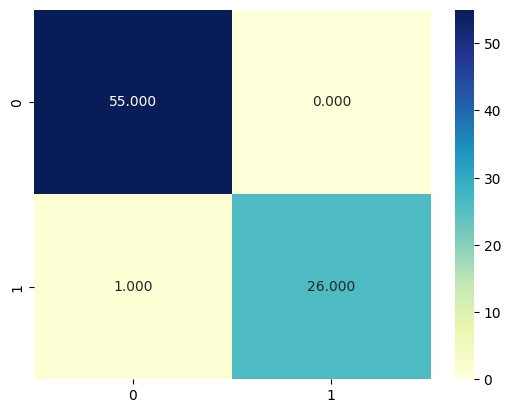

In [ ]:
sns.heatmap(cnf_matrix, annot= True, cmap= "YlGnBu", fmt = ".3f", xticklabels = labels, yticklabels = labels)
plt.show()

In [ ]:
y_pred = random_forest.predict(X)

In [ ]:
cnf_matrix = confusion_matrix(y,y_pred.round())

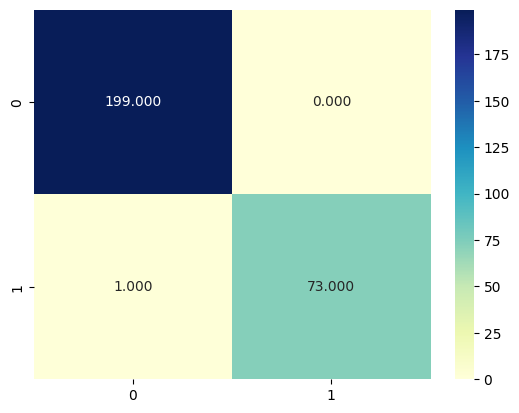

In [ ]:
sns.heatmap(cnf_matrix,annot = True, cmap = "YlGnBu",fmt =".3f", xticklabels=labels, yticklabels = labels)
plt.show()

In [ ]:
random_forest.score(X_test,y_test)

0.9878048780487805

In [ ]:
X_test



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
218,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,-5.390330,...,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,-0.345342
259,-17.275191,10.819665,-20.363886,6.046612,-13.465033,-4.166647,-14.409448,11.580797,-4.073856,-9.153368,...,1.544970,1.729804,-1.208096,-0.726839,0.112540,1.119193,-0.233189,1.684063,0.503740,0.177449
225,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,-0.345342
111,-0.558070,0.183585,0.988999,-1.982538,2.049334,3.905350,-0.261520,0.875691,0.515653,-0.632775,...,0.087507,-0.123504,-0.263537,-0.220005,1.063014,-0.144236,0.789798,-0.259684,-0.128883,-0.332192
178,1.045399,0.020179,0.879342,1.406794,-0.695494,-0.587486,-0.224606,-0.172379,1.620989,-0.425812,...,-0.006082,0.031410,0.193025,-0.143858,0.340647,0.473738,-0.343877,-0.000043,0.039508,0.128439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.944245,0.824887,2.721910,2.454300,-0.091508,0.812597,-0.106572,0.298789,-0.541558,0.344936,...,-0.105159,-0.012302,0.160847,0.047763,0.087540,0.173583,0.106354,-0.179846,-0.015332,-0.350623
205,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,-0.345342
262,-19.179826,11.817922,-21.919174,6.086236,-14.708845,-4.308888,-15.357952,12.857165,-3.999861,-8.928656,...,1.572950,1.746802,-1.353149,-0.762965,0.117028,1.297994,-0.224825,1.621052,0.484614,0.177449
264,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,-3.948455,-8.789723,...,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,0.177449


In [ ]:
import joblib

In [ ]:
joblib.dump(random_forest, 'random_forest_model.joblib')

['random_forest_model.joblib']

Accuracy: 0.9878048780487805
Precision: 1.0
Recall: 0.9629629629629629
F1 score: 0.9811320754716981


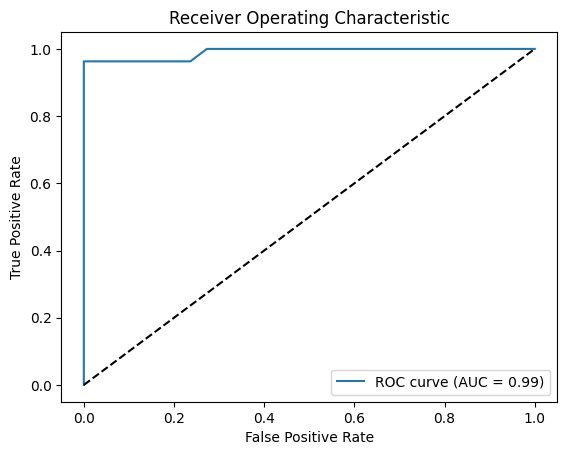

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

y_scores = random_forest.predict_proba(X_test)[:, 1] # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()